In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def GE(Cmatrix,vec):
    n=len(vec)
    for k in range(0,n-1): 
        for i in range(k+1,n):
            if Cmatrix[i,k] != 0.0:
                lam=Cmatrix[i,k]/Cmatrix[k,k]
                Cmatrix[i,k:n]=Cmatrix[i,k:n]-lam*Cmatrix[k,k:n]                
                vec[i]=vec[i]-lam*vec[k] 
    return Cmatrix,vec

In [4]:
def solvePoisson1(m):
    h=1/(m)
    x=np.linspace(0,1,m+1)
    A=(np.eye(m-1,k=1)-2*np.eye(m-1)+np.eye(m-1,k=-1))*(1/h)**2
    F=np.sin(np.pi*x[1:m])
    [A,F]=GE(A,F)
    
    u=np.zeros(m-1)
    u[m-1-1]=F[m-1-1]/A[m-1-1,m-1-1]
    for i in range(m-2):
        u[m-1-2-i]=(F[m-1-2-i]-np.dot(A[m-1-2-i][m-1-2-i+1:],u[m-1-2-i+1:]))/A[m-1-2-i,m-1-2-i]
    return u

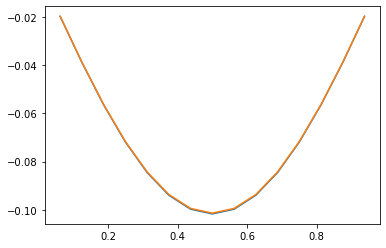

In [5]:
m=16
u8=solvePoisson1(m)
x=np.linspace(0,1,m+1)
plt.plot(x[1:m],u8)
plt.plot(x[1:m],-np.sin(np.pi*x[1:m])/(np.pi*np.pi))

In [6]:
m=8
u=solvePoisson1(m)
x=np.linspace(0,1,m+1)
exact=-1*np.sin(np.pi*x[1:m])/(np.pi*np.pi)
err8=np.linalg.norm((u-exact),np.inf)

In [7]:
m=16
u=solvePoisson1(m)
x=np.linspace(0,1,m+1)
exact=-1*np.sin(np.pi*x[1:m])/(np.pi*np.pi)
err16=np.linalg.norm((u-exact),np.inf)

In [8]:
m=32
u=solvePoisson1(m)
x=np.linspace(0,1,m+1)
exact=-1*np.sin(np.pi*x[1:m])/(np.pi*np.pi)
err32=np.linalg.norm((u-exact),np.inf)

In [9]:
m=64
u=solvePoisson1(m)
x=np.linspace(0,1,m+1)
exact=-1*np.sin(np.pi*x[1:m])/(np.pi*np.pi)
err64=np.linalg.norm((u-exact),np.inf)

In [10]:
np.log2((err8/err16))

2.0083667395261835

In [11]:
np.log2((err16/err32))

2.002087242820051

In [12]:
np.log2((err32/err64))

2.000521533818355

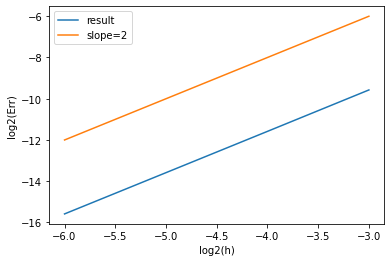

In [31]:
Err=np.array([err8,err16,err32,err64])

h=np.array([1/8,1/16,1/32,1/64])

plt.plot(np.log2(h),np.log2(Err),label='result')
plt.plot(np.log2(h),2*np.log2(h),label='slope=2')
plt.xlabel('log2(h)')
plt.ylabel('log2(Err)')
plt.legend()

In [67]:
Err

array([4.88281250e-04, 1.22070313e-04, 3.05175781e-05, 7.62939453e-06])

In [35]:
def solvePoisson2(m):
    h=1/(m)
    x=np.linspace(0,1,m+1)
    A=(np.eye(m-1,k=1)-2*np.eye(m-1)+np.eye(m-1,k=-1))*(1/h)**2
    F=np.ones(m-1)
    F[-1]=F[-1]-0.5*(1/h)**2
    [A,F]=GE(A,F)
    
    u=np.zeros(m-1)
    u[m-1-1]=F[m-1-1]/A[m-1-1,m-1-1]
    for i in range(m-2):
        u[m-1-2-i]=(F[m-1-2-i]-np.dot(A[m-1-2-i][m-1-2-i+1:],u[m-1-2-i+1:]))/A[m-1-2-i,m-1-2-i]
    return u

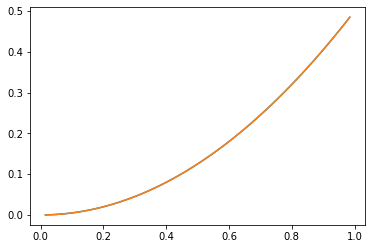

In [36]:
m=64
u8=solvePoisson2(m)
x=np.linspace(0,1,m+1)
plt.plot(x[1:m],u8)
exact=0.5*x[1:m]**2
plt.plot(x[1:m],exact)

In [103]:
m=8
u=solvePoisson2(m)
x=np.linspace(0,1,m+1)
exact=0.5*x[1:m]**2
err8=np.linalg.norm((u-exact),np.inf)

In [104]:
m=16
u=solvePoisson2(m)
x=np.linspace(0,1,m+1)
exact=0.5*x[1:m]**2
err16=np.linalg.norm((u-exact),np.inf)

In [105]:
m=32
u=solvePoisson2(m)
x=np.linspace(0,1,m+1)
exact=0.5*x[1:m]**2
err32=np.linalg.norm((u-exact),np.inf)

In [106]:
m=64
u=solvePoisson2(m)
x=np.linspace(0,1,m+1)
exact=0.5*x[1:m]**2
err64=np.linalg.norm((u-exact),np.inf)

In [107]:
np.log2((err8/err16))

1.0

In [108]:
np.log2((err16/err32))

-4.754887502163468

In [74]:
np.log2((err32/err64))

0.16992500144231237

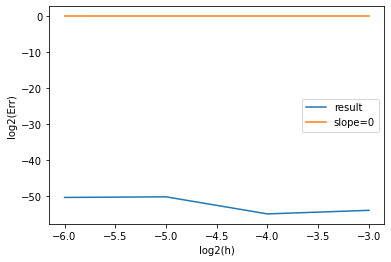

In [75]:
Err=np.array([err8,err16,err32,err64])

h=np.array([1/8,1/16,1/32,1/64])

plt.plot(np.log2(h),np.log2(Err),label='result')
plt.plot(np.log2(h),0*np.log2(Err),label='slope=0')
plt.xlabel('log2(h)')
plt.ylabel('log2(Err)')
plt.legend()

In [77]:
Err

array([5.55111512e-17, 2.77555756e-17, 7.49400542e-16, 6.66133815e-16])

In [91]:
def solvePoisson3(m):
    h=1/(m)
    x=np.linspace(0,1,m+1)
    A=(np.eye(m-1,k=1)-2*np.eye(m-1)+np.eye(m-1,k=-1))*(1/h)**2
    
    F=x[1:m]**2
    F[np.where(x[1:m]<0.5)]=0.5*(x[1:m][np.where(x[1:m]<0.5)])
    
    [A,F]=GE(A,F)
    
    u=np.zeros(m-1)
    u[m-1-1]=F[m-1-1]/A[m-1-1,m-1-1]
    for i in range(m-2):
        u[m-1-2-i]=(F[m-1-2-i]-np.dot(A[m-1-2-i][m-1-2-i+1:],u[m-1-2-i+1:]))/A[m-1-2-i,m-1-2-i]
    return u

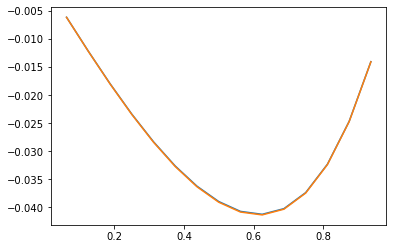

In [92]:
m=16
u8=solvePoisson3(m)
x=np.linspace(0,1,m+1)
plt.plot(x[1:m],u8)
exact=(1/12)*x[1:m]**4-(5/64)*x[1:m]-(1/192)
exact[np.where(x[1:m]<0.5)]=(1/12)*(x[1:m][np.where(x[1:m]<0.5)])**3+(-19/192)*(x[1:m][np.where(x[1:m]<0.5)])
    
plt.plot(x[1:m],exact)

In [112]:
m=8
u=solvePoisson3(m)
x=np.linspace(0,1,m+1)
exact=(1/12)*x[1:m]**4-(5/64)*x[1:m]-(1/192)
exact[np.where(x[1:m]<0.5)]=(1/12)*(x[1:m][np.where(x[1:m]<0.5)])**3+(-19/192)*(x[1:m][np.where(x[1:m]<0.5)])
err8=np.linalg.norm((u-exact),np.inf)

In [113]:
m=16
u=solvePoisson3(m)
x=np.linspace(0,1,m+1)
exact=(1/12)*x[1:m]**4-(5/64)*x[1:m]-(1/192)
exact[np.where(x[1:m]<0.5)]=(1/12)*(x[1:m][np.where(x[1:m]<0.5)])**3+(-19/192)*(x[1:m][np.where(x[1:m]<0.5)])

err16=np.linalg.norm((u-exact),np.inf)

In [114]:
m=32
u=solvePoisson3(m)
x=np.linspace(0,1,m+1)
exact=(1/12)*x[1:m]**4-(5/64)*x[1:m]-(1/192)
exact[np.where(x[1:m]<0.5)]=(1/12)*(x[1:m][np.where(x[1:m]<0.5)])**3+(-19/192)*(x[1:m][np.where(x[1:m]<0.5)])

err32=np.linalg.norm((u-exact),np.inf)

In [115]:
m=64
u=solvePoisson3(m)
x=np.linspace(0,1,m+1)
exact=(1/12)*x[1:m]**4-(5/64)*x[1:m]-(1/192)
exact[np.where(x[1:m]<0.5)]=(1/12)*(x[1:m][np.where(x[1:m]<0.5)])**3+(-19/192)*(x[1:m][np.where(x[1:m]<0.5)])

err64=np.linalg.norm((u-exact),np.inf)

In [116]:
np.log2((err8/err16))

1.999999999999877

In [117]:
np.log2((err16/err32))

1.9999999999945055

In [118]:
np.log2((err32/err64))

1.9999999999399702

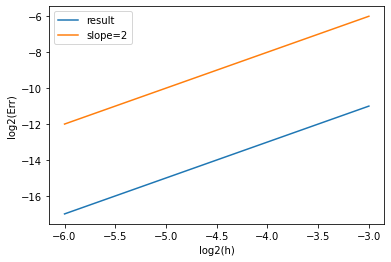

In [119]:
Err=np.array([err8,err16,err32,err64])

h=np.array([1/8,1/16,1/32,1/64])

plt.plot(np.log2(h),np.log2(Err),label='result')
plt.plot(np.log2(h),2*np.log2(h),label='slope=2')
plt.xlabel('log2(h)')
plt.ylabel('log2(Err)')
plt.legend()

In [120]:
Err

array([4.88281250e-04, 1.22070313e-04, 3.05175781e-05, 7.62939453e-06])

In [102]:
err8

0.0004882812499999861